# Regional US and Canadien Sports Team Success

Compare aggregate winning percentages of US and Canadien cities with >2 of the big 4 professional sports teams in the past 40 years.

I'm webscraping a variety of sources including: 

https://en.wikipedia.org/wiki/List_of_American_and_Canadian_cities_by_number_of_major_professional_sports_franchises
https://en.wikipedia.org/wiki/Relocation_of_professional_sports_teams
https://en.wikipedia.org/wiki/Major_professional_sports_teams_of_the_United_States_and_Canada
https://www.baseball-reference.com
https://www.pro-football-reference.com
https://www.basketball-reference.com
https://www.hockey-reference.com

In [1]:
import numpy as np
import pandas as pd

pd.set_option('max_colwidth',140)  # change max column width

Start by reading in the sports franchises by region

In [2]:
# Read the wiki table with list of sports franchises by region
site = 'https://en.wikipedia.org/wiki/List_of_American_and_Canadian_cities_by_number_of_major_professional_sports_franchises'
usecols = ['Metropolitan area', 'Country', 'Population (2016 est.)[8]','B4']

df_numf = pd.read_html(site,header=0)[1].loc[:,usecols]   # reads the correct dataframe

df_numf.rename(columns={'Metropolitan area': 'Region',
                        'Population (2016 est.)[8]': 'Population 2016'}, inplace=True)
df_numf = df_numf[df_numf['B4']>=3].drop(df_numf[df_numf['Region']=='Totals'].index)   # only use rows where big4 is greater than 2
df_numf

,Region,Country,Population 2016,B4
0,New York City,United States,20153634,9
1,Los Angeles,United States,13310447,8
2,Chicago,United States,9512999,5
3,San Francisco Bay Area,United States,6657982,5
4,Dallas–Fort Worth,United States,7233323,4
5,"Washington, D.C.",United States,6131977,4
6,Philadelphia,United States,6070500,4
7,Miami–Fort Lauderdale,United States,6066387,4
8,Boston,United States,4794447,4
9,Minneapolis–Saint Paul,United States,3551036,4


Read the list of major pro sports teams 

In [3]:
site = 'https://en.wikipedia.org/wiki/Major_professional_sports_teams_of_the_United_States_and_Canada'
usecols = ['Team', 'City', 'State/Province', 'League', 'Est.']
df_allteams = pd.read_html(site,header=0)[0].loc[:,usecols]  # read in all teams

df_allteams = (df_allteams.loc[df_allteams['League'].isin(['NBA','NFL','MLB','NHL'])]
               .reset_index(drop=True))  # only use teams in the big 4 leagues

# Change names of cities to allow for merging of data
names = {'Anaheim': 'Los Angeles',
         'Arlington': 'Dallas–Fort Worth',
         'Dallas': 'Dallas–Fort Worth',
         'East Rutherford': 'New York City',
         'Foxborough': 'Boston',
         'Glendale': 'Phoenix',
         'Inglewood': 'Los Angeles',
         'Landover': 'Washington, D.C.',
         'Miami Gardens': 'Miami–Fort Lauderdale',
         'Miami': 'Miami–Fort Lauderdale',
         'Minneapolis': 'Minneapolis–Saint Paul',
         'Newark': 'New York City',
         'Oakland': 'San Francisco Bay Area',
         'San Francisco': 'San Francisco Bay Area',
         'San Jose': 'San Francisco Bay Area',
         'Santa Clara': 'San Francisco Bay Area',
         'St. Paul': 'Minneapolis–Saint Paul',
         'St. Petersburg': 'Tampa Bay Area',
         'Sunrise': 'Miami–Fort Lauderdale',
         'Tampa': 'Tampa Bay Area',
         'Washington': 'Washington, D.C.'
        }
df_allteams.replace(names, inplace=True)



Merge the df_allteams and df_numf dataframes

In [4]:
cur_teams = pd.merge(df_numf, df_allteams, how='left', left_on='Region', right_on='City').drop('City',axis=1)

# check=df.sort_values('Est.',ascending=False)[df['Est.'].astype(int)>=1980]   # find teams that <40 years old

# Add rows based on the results of check
reg = ['Los Angeles','Los Angeles','Minneapolis–Saint Paul','Denver','Los Angeles','Phoenix','Chicago','Atlanta',
       'Los Angeles','Los Angeles','Los Angeles','Miami–Fort Lauderdale','Tampa Bay Area','New York City',
       'Washington, D.C.','Phoenix','San Francisco Bay Area','Houston']
tm = ['Los Angeles Rams','Los Angeles Raiders','Minnesota North Stars','Colorado Rockies',
      'Mighty Ducks of Anaheim','Phoenix Coyotes','Chicago Black Hawks','Atlanta Thrashers',
      'Anaheim Angels','California Angels','Los Angeles Angels of Anaheim','Florida Marlins',
      'Tampa Bay Devil Rays','New Jersey Nets','Washington Bullets','Phoenix Cardinals',
      'Oakland Raiders','Houston Oilers']
lg = ['NFL','NFL','NHL','NHL','NHL','NHL','NHL','NHL','MLB','MLB','MLB','MLB','MLB','NBA','NBA','NFL','NFL','NFL']
old_teams = pd.DataFrame({'Region': reg, 'Team': tm, 'League': lg})

# Combine old and new teams
df = pd.concat([cur_teams,old_teams],ignore_index=True,sort=False).sort_values(by='Region').reset_index(drop=True)

# Fill missing columns
cols = ['Country','Population 2016','B4','State/Province']
df.loc[:,cols] = df.groupby('Region')[cols].apply(lambda x: x.bfill())
df.loc[:,cols] = df.groupby('Region')[cols].apply(lambda x: x.ffill())

df

,Region,Country,Population 2016,B4,Team,State/Province,League,Est.
0,Atlanta,United States,5789700,3.0,Atlanta Hawks,Georgia,NBA,1968
1,Atlanta,United States,5789700,3.0,Atlanta Thrashers,Georgia,NHL,NaN
2,Atlanta,United States,5789700,3.0,Atlanta Braves,Georgia,MLB,1966
3,Atlanta,United States,5789700,3.0,Atlanta Falcons,Georgia,NFL,1966
4,Boston,United States,4794447,4.0,New England Patriots,Massachusetts,NFL,1960
5,Boston,United States,4794447,4.0,Boston Red Sox,Massachusetts,MLB,1901
6,Boston,United States,4794447,4.0,Boston Celtics,Massachusetts,NBA,1946
7,Boston,United States,4794447,4.0,Boston Bruins,Massachusetts,NHL,1924
8,Chicago,United States,9512999,5.0,Chicago White Sox,Illinois,MLB,1901
9,Chicago,United States,9512999,5.0,Chicago Cubs,Illinois,MLB,1870


Read in the teams from the big 4 leagues from the -reference sites

In [5]:
# Read the leagues teams
leagues = ['hockey','baseball','basketball','pro-football']
sites = ['https://www.{}-reference.com/teams/'.format(league) for league in leagues]
hds = [0,0,0,1]  # header rows for the various sites
[dfh,dfb,dfbb,dff] = [pd.read_html(site,header=hd)[0] for site, hd in zip(sites, hds)]


In [6]:
dfh

,Franchise,Lg,From,To,Yrs,GP,W,L,T,OL,PTS,PTS%,Yrs Plyf,Div,Conf,Champ,St Cup
0,Anaheim Ducks,NHL,1993,2020,26,2055,973,804,107.0,171.0,2224,0.541,14,6,2,1.0,1.0
1,Anaheim Ducks,NHL,2006,2020,14,1103,592,377,NaN,134.0,1318,0.597,10,6,1,1.0,1.0
2,Mighty Ducks of Anaheim,NHL,1993,2006,12,952,381,427,107.0,37.0,906,0.476,4,0,1,0.0,0.0
3,Arizona Coyotes,NHL,1979,2020,40,3178,1311,1442,266.0,159.0,3047,0.479,20,1,0,0.0,0.0
4,Arizona Coyotes,NHL,2014,2020,6,480,190,236,NaN,54.0,434,0.452,1,0,0,0.0,0.0
5,Phoenix Coyotes,NHL,1996,2014,17,1360,615,546,94.0,105.0,1429,0.525,8,1,0,0.0,0.0
6,Winnipeg Jets,NHL,1979,1996,17,1338,506,660,172.0,NaN,1184,0.442,11,0,0,0.0,0.0
7,Boston Bruins,NHL,1924,2020,95,6570,3208,2387,791.0,184.0,7391,0.562,73,29,5,6.0,6.0
8,Buffalo Sabres,NHL,1970,2020,49,3889,1790,1530,409.0,160.0,4149,0.533,29,6,1,0.0,0.0
9,Calgary Flames,NHL,1972,2020,47,3734,1739,1469,379.0,147.0,4004,0.536,30,7,3,1.0,1.0


## Get winning percentages for each team in the df dataframe
Start by reading the team IDs from each page (**WARNING THIS STEP CAN TAKE SEVERAL MINUTES TO RUN**)

In [7]:
bid = ['ATL', 'ARI', 'BAL', 'BOS', 'CHC', 'CHW', 'CIN', 'CLE', 'COL', 'DET',
       'KCR', 'HOU', 'LAA', 'LAD', 'MIA', 'MIL', 'MIN', 'NYM', 'NYY', 'OAK',
       'PHI', 'PIT', 'SDP', 'SEA', 'SFG', 'STL', 'TBR', 'TEX', 'TOR', 'WSN']
hid = ['ANA', 'PHX', 'BOS', 'BUF', 'CGY', 'CAR', 'CHI', 'COL', 'CBJ', 'DAL',
       'DET', 'EDM', 'FLA', 'LAK', 'MIN', 'MTL', 'NSH', 'NJD', 'NYI', 'NYR',
       'OTT', 'PHI', 'PIT', 'SJS', 'STL', 'TBL', 'TOR', 'VAN', 'VEG', 'WSH',
       'WPG']
bbid= ['ATL', 'BOS', 'NJN', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW',
       'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOH', 'NYK',
       'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']
fid = ['crd', 'atl', 'rav', 'buf', 'car', 'chi', 'cin', 'cle', 'dal', 'den',
       'det', 'gnb', 'htx', 'clt', 'jax', 'kan', 'sdg', 'ram', 'mia', 'min',
       'nwe', 'nor', 'nyg', 'nyj', 'rai', 'phi', 'pit', 'sfo', 'sea', 'tam',
       'oti', 'was']

In [8]:
# Hockey
h_franc = []
for team in hid:
    print('reading {} in {}'.format(team,leagues[0]))
    link = 'https://www.{}-reference.com/teams/{}/history.html'.format(leagues[0],team)
    try:
        read = pd.read_html(link,header=0)[0]
        h_franc.append(read)
    except:
        print('{} could NOT be accessed at \n{}'.format(team,link))

reading ANA in hockey
reading PHX in hockey
reading BOS in hockey
reading BUF in hockey
reading CGY in hockey
reading CAR in hockey
reading CHI in hockey
reading COL in hockey
reading CBJ in hockey
reading DAL in hockey
reading DET in hockey
reading EDM in hockey
reading FLA in hockey
reading LAK in hockey
reading MIN in hockey
reading MTL in hockey
reading NSH in hockey
reading NJD in hockey
reading NYI in hockey
reading NYR in hockey
reading OTT in hockey
reading PHI in hockey
reading PIT in hockey
reading SJS in hockey
reading STL in hockey
reading TBL in hockey
reading TOR in hockey
reading VAN in hockey
reading VEG in hockey
reading WSH in hockey
reading WPG in hockey


In [9]:
# Baseball
b_franc = []
for team in bid:
    print('reading {} in {}'.format(team,leagues[1]))
    link = 'https://www.{}-reference.com/teams/{}/'.format(leagues[1],team)
    try:
        read = pd.read_html(link,header=0)[0]
        b_franc.append(read)
    except:
        print('{} could NOT be accessed at \n{}'.format(team,link))

reading ATL in baseball
reading ARI in baseball
reading BAL in baseball
reading BOS in baseball
reading CHC in baseball
reading CHW in baseball
reading CIN in baseball
reading CLE in baseball
reading COL in baseball
reading DET in baseball
reading KCR in baseball
reading HOU in baseball
reading LAA in baseball
reading LAD in baseball
reading MIA in baseball
reading MIL in baseball
reading MIN in baseball
reading NYM in baseball
reading NYY in baseball
reading OAK in baseball
reading PHI in baseball
reading PIT in baseball
reading SDP in baseball
reading SEA in baseball
reading SFG in baseball
reading STL in baseball
reading TBR in baseball
reading TEX in baseball
reading TOR in baseball
reading WSN in baseball


In [10]:
# Basketball
bb_franc = []
for team in bbid:
    print('reading {} in {}'.format(team,leagues[2]))
    link = 'https://www.{}-reference.com/teams/{}/'.format(leagues[2],team)
    try:
        read = pd.read_html(link,header=0)[0]
        bb_franc.append(read)
    except:
        print('{} could NOT be accessed at \n{}'.format(team,link))

reading ATL in basketball
reading BOS in basketball
reading NJN in basketball
reading CHA in basketball
reading CHI in basketball
reading CLE in basketball
reading DAL in basketball
reading DEN in basketball
reading DET in basketball
reading GSW in basketball
reading HOU in basketball
reading IND in basketball
reading LAC in basketball
reading LAL in basketball
reading MEM in basketball
reading MIA in basketball
reading MIL in basketball
reading MIN in basketball
reading NOH in basketball
reading NYK in basketball
reading OKC in basketball
reading ORL in basketball
reading PHI in basketball
reading PHO in basketball
reading POR in basketball
reading SAC in basketball
reading SAS in basketball
reading TOR in basketball
reading UTA in basketball
reading WAS in basketball


In [11]:
# Football
f_franc = []
for team in fid:
    print('reading {} in {}'.format(team,leagues[3]))
    link = 'https://www.{}-reference.com/teams/{}/'.format(leagues[3],team)
    try:
        read = pd.read_html(link,header=1)[0]
        f_franc.append(read)
    except:
        print('{} could NOT be accessed at \n{}'.format(team,link))

reading crd in pro-football
reading atl in pro-football
reading rav in pro-football
reading buf in pro-football
reading car in pro-football
reading chi in pro-football
reading cin in pro-football
reading cle in pro-football
reading dal in pro-football
reading den in pro-football
reading det in pro-football
reading gnb in pro-football
reading htx in pro-football
reading clt in pro-football
reading jax in pro-football
reading kan in pro-football
reading sdg in pro-football
reading ram in pro-football
reading mia in pro-football
reading min in pro-football
reading nwe in pro-football
reading nor in pro-football
reading nyg in pro-football
reading nyj in pro-football
reading rai in pro-football
reading phi in pro-football
reading pit in pro-football
reading sfo in pro-football
reading sea in pro-football
reading tam in pro-football
reading oti in pro-football
reading was in pro-football


Clean the data from h_franc, b_franc, bb_fran, f_franc 

**NOTE: these are lists of dataframes of each sport**

In [12]:
for df_team in h_franc+b_franc+bb_franc+f_franc:
    df_team.rename(columns={'Tm':'Team',
                            'Year':'Season',
                            'W-L%':'W/L%',
                            'Ties': 'T',
                            'Lg': 'League'} ,inplace=True)  # change column names to match the rest
    df_team.dropna(axis=1, how='all', inplace=True)  # drop columns that dont contain data
    df_team.dropna(axis=0, how='all', inplace=True)  # drop rows that dont contain data
    df_team['Team'] = df_team['Team'].replace({'\\xa0':' ', '[*]':''},regex=True)  # replace errant characters
    
    # Cleanup the season format (drop the "-") and convert to integer
    df_team['Season'] = df_team.apply(lambda row: str(row['Season']).split('-')[0],axis=1)
    df_team.drop(df_team[~df_team['Season'].str.isnumeric()].index, inplace=True)   # only use numeric
    df_team.drop(df_team[df_team['Season'].isna()].index, inplace=True)             # only use non-nans
    df_team['Season'] = df_team['Season'].astype(int)   # convert to integers
    

# Calculate the winning percentage in football
def winpct(row):
    try:
        tot = float(row['W']) + float(row['L']) + float(row['T'])
    except:
        print('failed on \n{}'.format(row))
    return (float(row['W']) + float(row['T'])/2.0) / tot

for df_team in f_franc:
    df_team['W/L%'] = df_team.apply(winpct, axis=1)

# Baseball uses division for the league, so it needs to be cleaned
for df_team in b_franc:
    df_team.rename(columns={'League': 'Division'},inplace=True)
    df_team['League'] = 'MLB'
    
f_franc[0]

,Season,League,Team,W,L,T,Div. Finish,Playoffs,PF,PA,...,T/G,Pts±,Yds±,out of,MoV,SoS,SRS,OSRS,DSRS,W/L%
0,2020,NFL,Arizona Cardinals,6,3,0,1st of 4,NaN,266,210,...,16,8,6,32,6.2,-2.6,3.6,2.7,0.9,0.666667
1,2019,NFL,Arizona Cardinals,5,10,1,4th of 4,NaN,361,442,...,18,23,29,32,-5.1,1.8,-3.2,-0.3,-2.9,0.343750
2,2018,NFL,Arizona Cardinals,3,13,0,4th of 4,NaN,225,425,...,29,32,32,32,-12.5,1.0,-11.5,-9.6,-1.9,0.187500
3,2017,NFL,Arizona Cardinals,8,8,0,3rd of 4,NaN,295,361,...,23,24,15,32,-4.1,0.4,-3.7,-4.0,0.2,0.500000
4,2016,NFL,Arizona Cardinals,7,8,1,2nd of 4,NaN,418,362,...,17,7,1,32,3.5,-1.9,1.6,2.4,-0.8,0.468750
5,2015,NFL,Arizona Cardinals,13,3,0,1st of 4,Lost Conf,489,313,...,4,2,2,32,11.0,1.3,12.3,9.0,3.4,0.812500
6,2014,NFL,Arizona Cardinals,11,5,0,2nd of 4,Lost WC,310,299,...,5,16,27,32,0.7,1.3,2.0,-2.4,4.4,0.687500
7,2013,NFL,Arizona Cardinals,10,6,0,3rd of 4,NaN,379,324,...,17,10,7,32,3.4,3.0,6.4,2.7,3.7,0.625000
8,2012,NFL,Arizona Cardinals,5,11,0,4th of 4,NaN,250,357,...,17,27,31,32,-6.7,3.5,-3.2,-4.8,1.6,0.312500
9,2011,NFL,Arizona Cardinals,8,8,0,2nd of 4,NaN,312,348,...,28,21,25,32,-2.3,0.0,-2.2,-1.7,-0.5,0.500000


Create functions to: 
 - merge df with each team in h_franc, b_franc, bb_franc, and f_franc
 - groupby region and aggregate avg winning % making sure that the count is GE chosen number of teams

In [13]:
# Function to perform df combination
def combine_dfs(year_start=1980):
    # Create a copy of the original df and set the index for merging
    df_comb = df.copy().set_index(['Team','League'])

    # Add columns for the years of interest
    for yr in np.arange(year_start,2020):
        df_comb[yr] = np.nan

    # Pivot each of the df_teams from year_start-2019 then merge (using update) with df_comb dataframe
    for df_team in h_franc:
        # Use PT% for winning pct in hockey
        df_pvt = df_team[df_team['Season']>=year_start].pivot_table(values='PTS%',index=['Team','League'],columns='Season')
        df_comb.update(df_pvt)

    for df_team in b_franc+bb_franc+f_franc:
        # Use W/L% for winnning pct in the rest
        df_pvt = df_team[df_team['Season']>=year_start].pivot_table(values='W/L%',index=['Team','League'],columns='Season')
        df_comb.update(df_pvt)
        
    return df_comb.reset_index().set_index('Team')
    
def group_dfs(df_comb, num_teams=4):
    df_grp = df_comb.reset_index().groupby('Region').agg(['mean','count']).drop(columns='B4').T  # if need count too
    # df_grp.index.get_level_values(level=1)  # check level 1 of the index

    df_mean=df_grp.xs('mean', level=1, axis=0, drop_level=True)  # get mean values from each year
    df_count=df_grp.xs('count', level=1, axis=0, drop_level=True)>=num_teams  # get count values from each year that are GE to num teams
    return df_mean[df_count]

combine_dfs(year_start=1978).reset_index().set_index('Region').loc['Denver',:].T


Region,Denver,Denver,Denver,Denver,Denver
Team,Colorado Rockies,Denver Nuggets,Colorado Avalanche,Denver Broncos,Colorado Rockies
League,MLB,NBA,NHL,NFL,NHL
Country,United States,United States,United States,United States,United States
Population 2016,2853077,2853077,2853077,2853077,2853077
B4,4,4,4,4,4
State/Province,Colorado,Colorado,Colorado,Colorado,Colorado
Est.,1993,1967,1995,1960,NaN
1978,NaN,0.573,NaN,0.625,0.263
1979,NaN,0.366,NaN,0.625,0.319
1980,NaN,0.451,NaN,0.5,0.356


Clean and plot the data

<IPython.core.display.Javascript object>


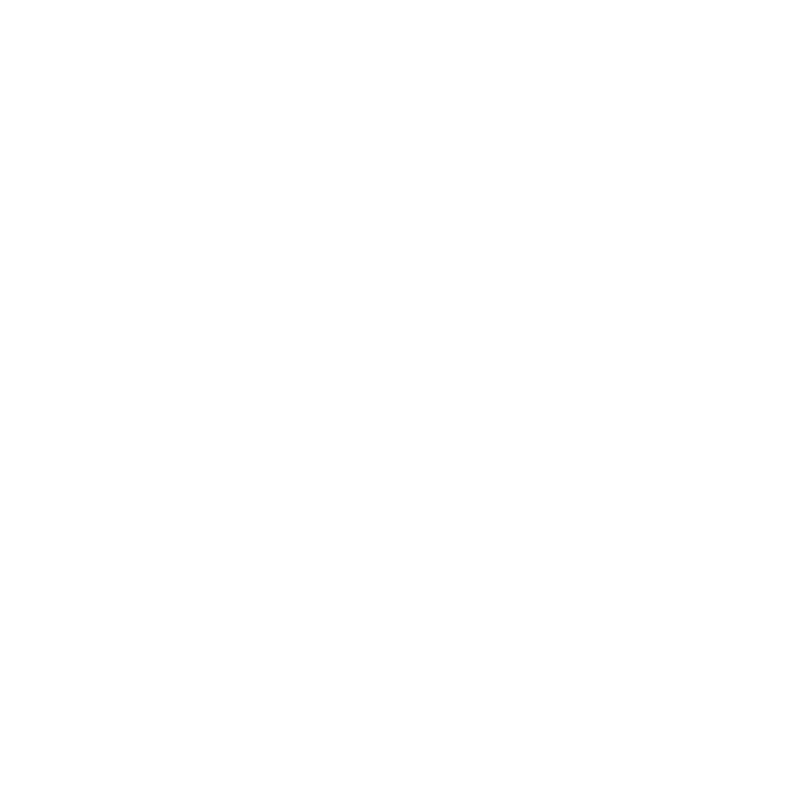

NameError: name 'ax' is not defined

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

# Grab data for plotting
df_plt = group_dfs(combine_dfs(year_start=1978), num_teams=3)

# shorten long names for plot legend
df_plt.rename(columns={'Dallas–Fort Worth': 'Dallas',
                       'Miami–Fort Lauderdale': 'Miami',
                       'Minneapolis–Saint Paul': 'Minneapolis',
                       'San Francisco Bay Area': 'San Francisco',
                       'Tampa Bay Area': 'Tampa',
                       'Washington, D.C.': 'Washington DC'}, inplace=True)

# Use only midwest regions
midwest=['Chicago','Cleveland','Detroit','Minneapolis','Pittsburgh']
df_plt = df_plt[midwest]

# Drop columns that are all nans
df_plt.dropna(how='all',axis=1,inplace=True)

# Smooth the data over 3 year period
df_plt = df_plt.rolling(3, min_periods=2).mean().iloc[2:,:]

# Set legend loc
legend = 'line'

# START PLOTTING
p = df_plt.plot(figsize=(8,8), cmap='brg', legend=None)

# Clean plot
plt.box(False)  # remove frame
plt.tick_params(axis='both',length=0)  # remove ticks
plt.rc('grid',linestyle='-')   # set grid specs
plt.gca().yaxis.grid(True)    # turn on horizontal grid

# Set labelling
p.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])  # use percentage
tit = 'Average Yearly Winning Percentage for Midwest Pro Sports Teams \nBy Metro Area'
plt.title(tit,fontsize=14,fontweight='bold')
txt = ('\nNOTE:'+
       '\n- Only including areas currently with and yearly active seasons >2'+
       '\n- Leagues used are MLB, NBA, NFL, NHL'
       '\n- Data smoothed over a 3-year period')
plt.xlabel(txt, style='italic', fontsize=8, horizontalalignment='left', x=0.05)

if legend=='line':
    # Set legend to the end of the line
    for line, name in zip(p.lines, df_plt.columns):
        y = line.get_ydata()[-1]   # get y-location of last x-point
        p.annotate(name, xy=(0.99,y), xytext=(6,0), color=line.get_color(),
                    xycoords=ax.get_yaxis_transform(), textcoords='offset points',
                    size=9, va='center')
else:  # Legend outside of plot
    # Shrink current axis by 20%
    box = plt.gca().get_position()
    plt.gca().set_position([box.x0, box.y0, box.width * 0.85, box.height])

    # # Put a legend to the right of the current axis
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
